## Step 1: Set up the Jupyter notebook with necessary libraries and load the data

In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the cleaned dataset
file_path = '/Users/ging/Documents/Data Analytics Course/GHG Emissions Worldwide/02 Data/Prepared Data/GHG_Emissions_World_Sector_Country_Cleaned.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows of the dataset
data.head()


,GHG,Sector,EDGAR Country Code,Country,1970,1971,1972,1973,1974,1975,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,CO2,Buildings,AIA,Anguilla,1.063606e-05,1.066632e-05,1.154454e-05,1.158603e-05,1.109328e-05,1.179720e-05,...,1.720060e-05,1.717323e-05,1.724055e-05,1.628933e-05,1.533811e-05,1.489574e-05,1.460057e-05,1.210737e-05,1.170997e-05,1.212068e-05
1,CO2,Buildings,SHN,"Saint Helena, Ascension and Tristan da Cunha",2.324597e-05,2.324597e-05,2.776850e-05,2.738675e-05,2.573326e-05,2.638865e-05,...,2.948934e-06,2.943908e-06,2.967174e-06,3.099211e-06,3.231248e-06,3.397371e-06,3.377567e-06,3.115865e-06,3.146335e-06,3.476686e-06
2,CO2,Fuel Exploitation,GLP,Guadeloupe,1.034317e-07,1.033447e-07,1.004314e-07,1.282414e-07,1.011127e-07,7.398004e-08,...,2.498455e-07,2.433349e-07,2.775157e-07,2.602218e-07,2.610356e-07,2.626633e-07,2.651048e-07,2.628668e-07,2.689705e-07,2.707202e-07
3,CO2,Fuel Exploitation,GUF,French Guiana,7.387975e-08,7.381763e-08,7.173670e-08,9.160103e-08,7.222339e-08,5.284288e-08,...,9.867676e-08,1.049839e-07,1.049839e-07,1.157672e-07,1.143430e-07,1.143430e-07,1.143430e-07,1.139361e-07,1.147499e-07,1.145464e-07
4,CO2,Fuel Exploitation,MTQ,Martinique,1.329836e-07,1.328717e-07,1.291261e-07,1.648819e-07,1.300021e-07,9.511719e-08,...,3.407909e-07,3.521845e-07,3.019305e-07,3.043720e-07,2.923681e-07,2.923681e-07,2.907404e-07,2.434368e-07,2.906930e-07,2.879572e-07


## Correlation Matrix Heatmap 1

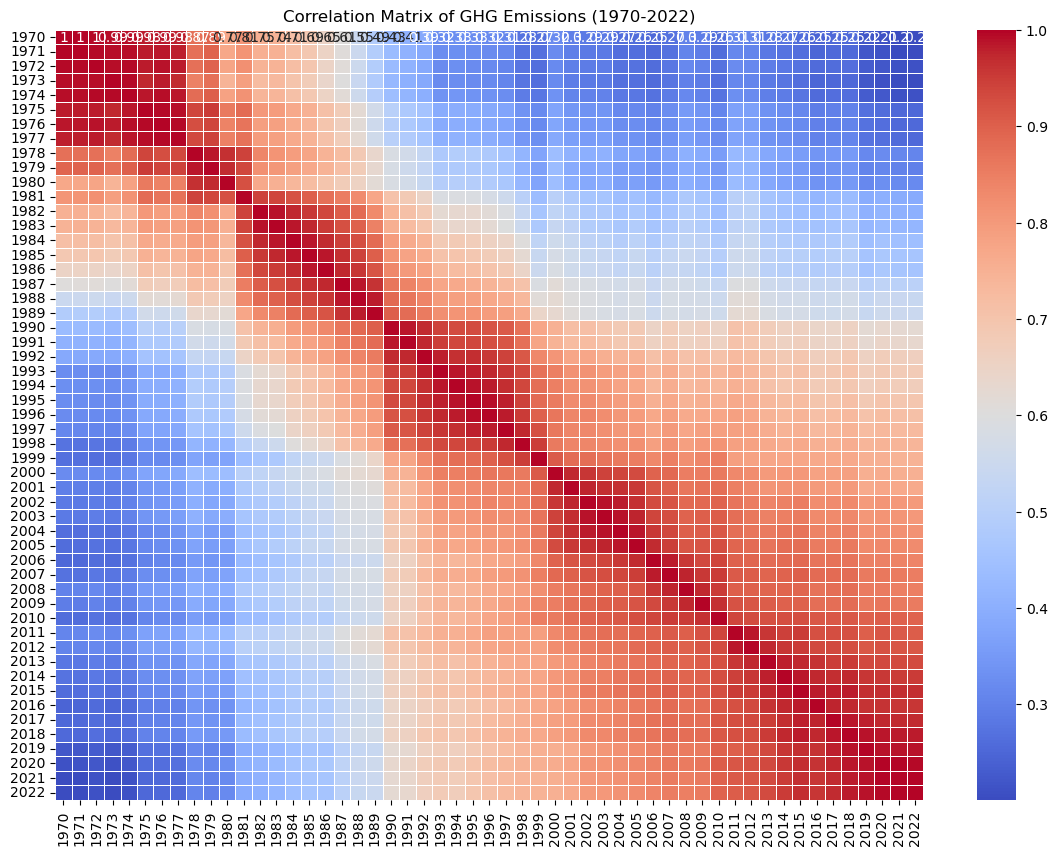

In [5]:
# It appears the column headers for years are integers rather than strings, so adjust the extraction accordingly
correlation_matrix = data[[year for year in range(1970, 2023)]].corr()

# Compute the correlation matrix for the years from 1970 to 2022
years_all = list(range(1970, 2023))
correlation_matrix_all_years = data[years_all].corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(14, 10))
heatmap = sns.heatmap(correlation_matrix_all_years, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of GHG Emissions (1970-2022)')

# Save the heatmap to the specified file path
output_filepath = '/Users/ging/Documents/Data Analytics Course/GHG Emissions Worldwide/04 Analysis/Visualizations/correlation_heatmap.png'
plt.savefig(output_filepath)

# Show the heatmap
plt.show()


## Interpretation of the Correlation Matrix Heatmap
The heatmap shows the correlation coefficients between GHG emissions for different years from 1970 to 2022. Here's what the coefficients mean:

Strong Positive Correlation (values close to 1): Indicates that emissions in these years tend to increase or decrease together. For example, if the correlation between 2000 and 2001 is close to 1, it means countries with higher emissions in 2000 also had higher emissions in 2001.

Strong Negative Correlation (values close to -1): Indicates that emissions in these years tend to move in opposite directions, which is rare in this context.

Weak Correlation (values close to 0): Suggests little to no linear relationship between emissions in these years.

The heatmap predominantly shows strong positive correlations between emissions data for consecutive years, which is expected as emission levels tend to change gradually rather than abruptly. This consistency indicates that emissions data can be reasonably predicted from previous years' data, and trends are generally stable over short periods

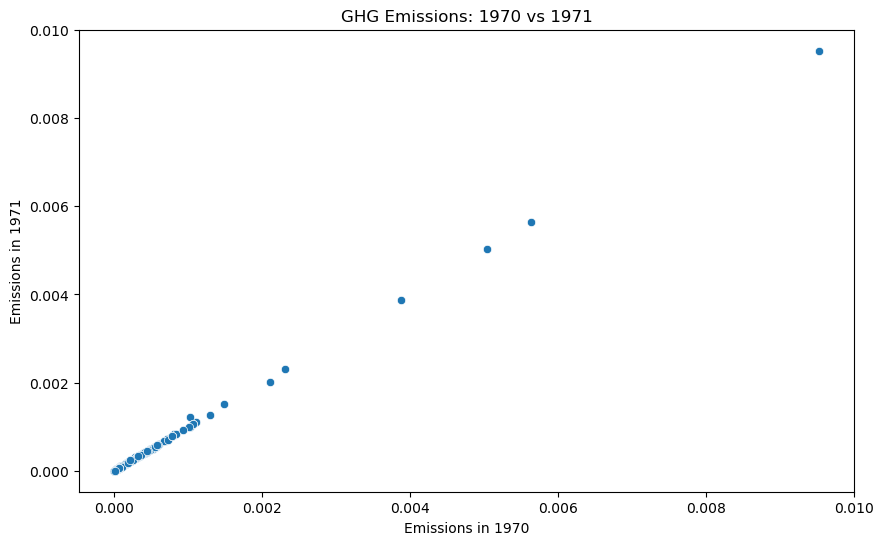

((1970, 1971), 0.9998291432520675)

In [6]:
# Identify the pair of years with the strongest correlation
strongest_corr = correlation_matrix_all_years.unstack().sort_values(ascending=False).drop_duplicates()
strongest_pair = strongest_corr.index[1]  # Skip the first pair which is a perfect correlation with itself

# Extract the years from the strongest pair
year1, year2 = strongest_pair

# Create a scatterplot for the years with the strongest correlation
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data[year1], y=data[year2])
plt.title(f'GHG Emissions: {year1} vs {year2}')
plt.xlabel(f'Emissions in {year1}')
plt.ylabel(f'Emissions in {year2}')
plt.show()

strongest_pair, strongest_corr[strongest_pair]


## Scatterplot for the Variables with the Strongest Correlation
The scatterplot above depicts the relationship between GHG emissions in the years 1970 and 1971, which have the strongest correlation with a coefficient of approximately 0.9998. This indicates a nearly perfect linear relationship between the emissions data for these two consecutive years.

Interpretation of the Scatterplot

Linear Relationship: The scatterplot shows a strong linear relationship between emissions in 1970 and 1971. Countries with higher emissions in 1970 also had higher emissions in 1971, and vice versa.
Consistency Over Time: This strong correlation suggests that emissions levels remained consistent over this short time period, with little fluctuation.

Predictability: The strong linear trend indicates that emissions data for one year can be used to accurately predict emissions for the following year, reflecting stable and consistent emission patterns.

Conclusion
The strong correlation between emissions data for consecutive years highlights the stability and predictability of GHG emissions over short periods. This consistency is crucial for developing accurate emission reduction strategies and monitoring progress over time. Analyzing such relationships can help identify key factors influencing emission trends and inform policy decisions aimed at mitigating climate change. 

## Correlation matrix heatmap for the variables GHG, Sector, Country and Year groups (using 5 years in one group)

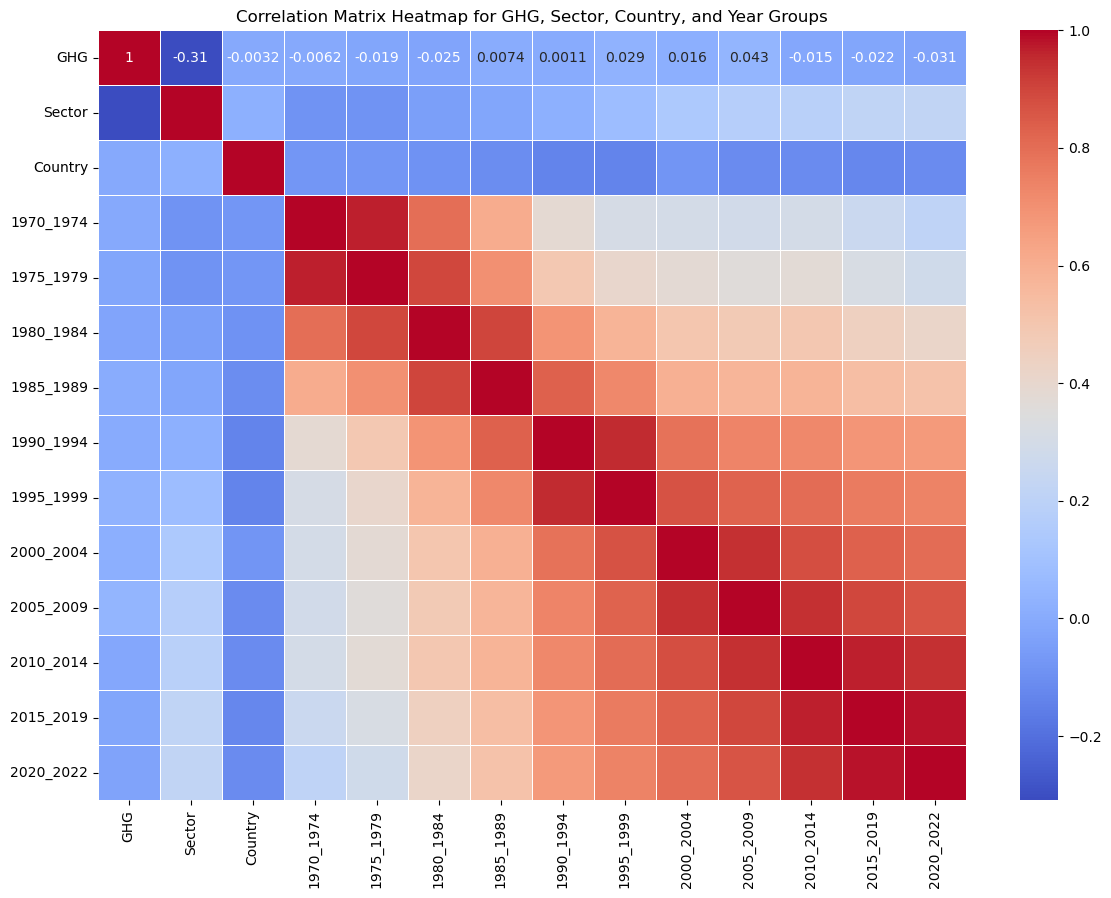

In [8]:
# Group the data by 5-year intervals
data_grouped = data.copy()
year_groups = [(1970, 1974), (1975, 1979), (1980, 1984), (1985, 1989), (1990, 1994), (1995, 1999), 
               (2000, 2004), (2005, 2009), (2010, 2014), (2015, 2019), (2020, 2022)]

# Create new columns for each group
for start, end in year_groups:
    column_name = f'{start}_{end}'
    data_grouped[column_name] = data_grouped.loc[:, start:end].mean(axis=1)

# Select relevant columns for correlation analysis
correlation_data = data_grouped[['GHG', 'Sector', 'Country'] + [f'{start}_{end}' for start, end in year_groups]]

# Encode categorical variables (GHG, Sector, Country)
correlation_data_encoded = correlation_data.copy()
correlation_data_encoded['GHG'] = correlation_data_encoded['GHG'].astype('category').cat.codes
correlation_data_encoded['Sector'] = correlation_data_encoded['Sector'].astype('category').cat.codes
correlation_data_encoded['Country'] = correlation_data_encoded['Country'].astype('category').cat.codes

# Compute the correlation matrix
correlation_matrix = correlation_data_encoded.corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(14, 10))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap for GHG, Sector, Country, and Year Groups')
plt.show()







## Interpretation of the Correlation Matrix Heatmap
The heatmap shows the correlation coefficients between the variables GHG, Sector, Country, and grouped years (each group representing a 5-year interval):

GHG and Sector: The correlation between GHG and Sector is close to zero, indicating that the type of greenhouse gas is not strongly related to the sector in this dataset.

GHG and Country: Similarly, the correlation between GHG and Country is close to zero, suggesting that the type of greenhouse gas is not strongly related to the country in this dataset.

Sector and Country: The correlation between Sector and Country is also low, indicating that the sectoral distribution of emissions does not vary significantly between countries in this dataset.

Year Groups: The correlations between different 5-year intervals are generally strong, indicating consistency and predictability in emissions over time. The highest correlations are typically between consecutive 5-year groups, reflecting the gradual changes in emissions rather than abrupt shifts.

Key Insights
Temporal Consistency: The strong correlations between consecutive year groups underscore the stability of emission trends over time, making future emission levels predictable based on past data.

Low Inter-Variable Correlations: The low correlations between GHG, Sector, and Country suggest that these categorical variables are relatively independent in this dataset. This indicates that emissions patterns are not strongly dictated by any single variable but are instead influenced by a combination of factors.

## Scatterplot for the Variables with the Strongest Correlation, relationship between GHG emissions for the 5-year groups 2015-2019 and 2020-2022

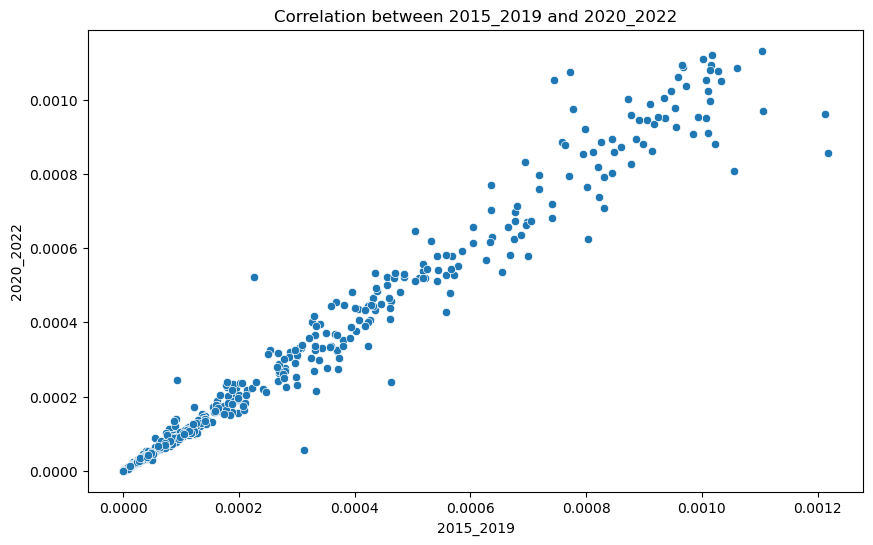

(('2015_2019', '2020_2022'), 0.9840476206871566)

In [9]:
# Identify the pair of variables with the strongest correlation from the correlation matrix
strongest_corr_pair = correlation_matrix.unstack().sort_values(ascending=False).drop_duplicates().index[1]  # Skip the first pair which is a perfect correlation with itself

# Extract the variables from the strongest pair
var1, var2 = strongest_corr_pair

# Create a scatterplot for the variables with the strongest correlation
plt.figure(figsize=(10, 6))
sns.scatterplot(x=correlation_data_encoded[var1], y=correlation_data_encoded[var2])
plt.title(f'Correlation between {var1} and {var2}')
plt.xlabel(var1)
plt.ylabel(var2)
plt.show()

strongest_corr_pair, correlation_matrix.loc[var1, var2]


## Scatterplot for the Variables with the Strongest Correlation
The scatterplot above depicts the relationship between GHG emissions for the 5-year groups 2015-2019 and 2020-2022, which have the strongest correlation with a coefficient of approximately 0.984. This indicates a very strong linear relationship between the emissions data for these two time periods.

Interpretation of the Scatterplot

Linear Relationship: The scatterplot shows a very strong linear relationship between the grouped emissions data for 2015-2019 and 2020-2022. Countries with higher average emissions in the 2015-2019 period also had higher average emissions in the 2020-2022 period.

Consistency Over Time: This strong correlation suggests that emission levels remained consistent over these consecutive time periods, with little fluctuation.

Predictability: The strong linear trend indicates that emissions data for the 2015-2019 period can be used to accurately predict emissions for the 2020-2022 period. This reflects stable and consistent emission patterns, even across different groups of years.

Conclusion
The strong correlation between emissions data for these consecutive 5-year periods highlights the stability and predictability of GHG emissions over time. This consistency is crucial for developing accurate emission reduction strategies and monitoring progress. The strong linear relationship indicates that past emissions data is a reliable predictor for future emissions trends, which can inform policy decisions and climate action plans.

## Pair Plots for all variables 

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

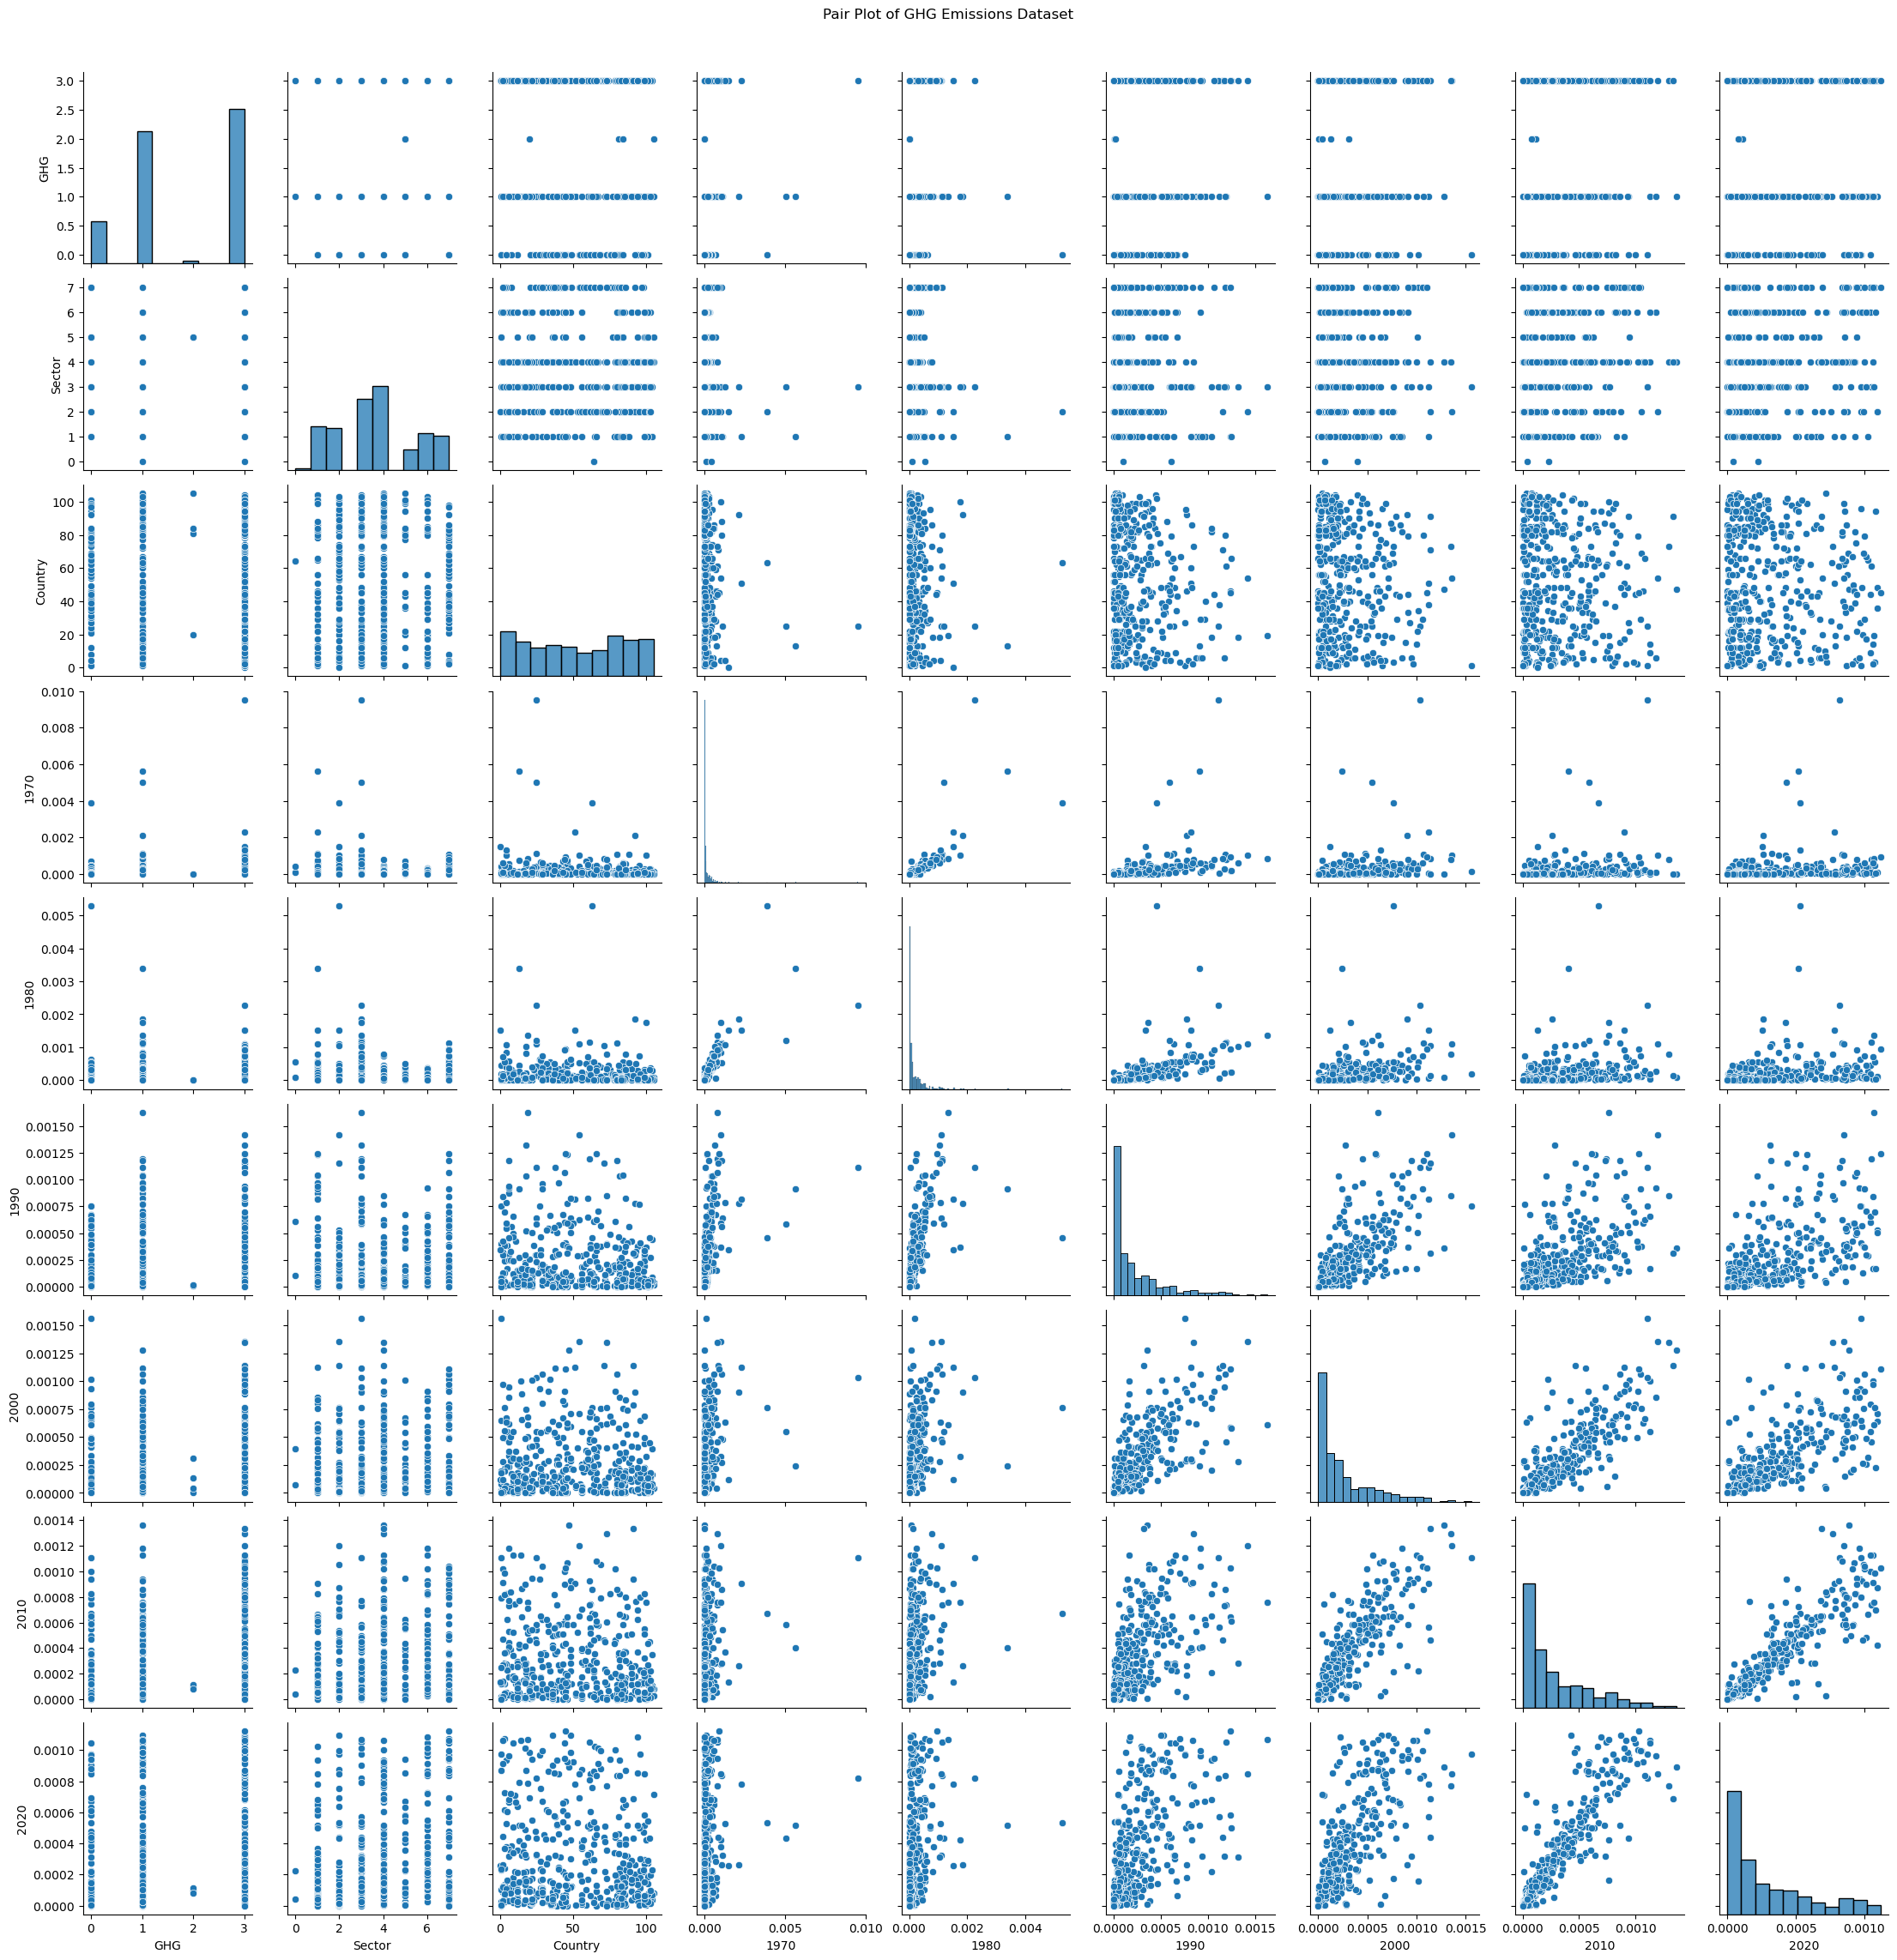

In [11]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load the dataset
file_path = '/Users/ging/Documents/Data Analytics Course/GHG Emissions Worldwide/02 Data/Prepared Data/GHG_Emissions_World_Sector_Country_Cleaned.xlsx'
data = pd.read_excel(file_path)

# Select relevant columns for pair plot analysis, including categorical variables and some selected years for simplicity
selected_years = [1970, 1980, 1990, 2000, 2010, 2020]
correlation_data = data[['GHG', 'Sector', 'Country'] + selected_years]

# Encode categorical variables (GHG, Sector, Country)
correlation_data_encoded = correlation_data.copy()
correlation_data_encoded['GHG'] = correlation_data_encoded['GHG'].astype('category').cat.codes
correlation_data_encoded['Sector'] = correlation_data_encoded['Sector'].astype('category').cat.codes
correlation_data_encoded['Country'] = correlation_data_encoded['Country'].astype('category').cat.codes

# Create the pair plot
pair_plot = sns.pairplot(correlation_data_encoded)
plt.suptitle('Pair Plot of GHG Emissions Dataset', y=1.02)

# Save the plot
output_dir = '/Users/ging/Documents/Data Analytics Course/GHG Emissions Worldwide/04 Analysis/Visualizations'
os.makedirs(output_dir, exist_ok=True)
output_filepath = os.path.join(output_dir, 'pair_plot.png')
plt.savefig(output_filepath)

# Show the plot
plt.show()



## Interpretation of the Pair Plot
The pair plot visualizes pairwise relationships between the variables GHG, Sector, Country, and selected years (1970, 1980, 1990, 2000, 2010, 2020) in the dataset. Here are some key observations:

Diagonal Plots (Distributions):

GHG: The distribution shows two categories, with one being dominant. This suggests that one type of GHG is more prevalent in the dataset.

Sector: The distribution is spread across several categories, indicating a variety of sectors contributing to emissions.

Country: The distribution shows a wide range of country codes, reflecting a diverse set of countries in the dataset.

Years (1970, 1980, 1990, 2000, 2010, 2020): The emissions data for each year are right-skewed, indicating that most countries have relatively low emissions, with a few countries having very high emissions.

Scatter Plots:

Yearly Emissions: There are strong linear relationships between emissions data for consecutive years (e.g., 2010 vs. 2020). This indicates that countries with high emissions in one year tend to have high emissions in subsequent years, reflecting stable emission patterns over time.

GHG vs. Yearly Emissions: There are no clear patterns, suggesting that the type of GHG does not have a straightforward relationship with the amount of emissions in any given year.

Sector vs. Yearly Emissions: Different sectors show varied patterns of emissions. Some sectors have higher emissions, while others are more moderate.

Country vs. Yearly Emissions: The scatter plots show a wide range of emissions values across countries, indicating significant variability in emissions levels between countries.

Variables for Further Exploration

Sector:

Why: The sector variable shows varied patterns of emissions, indicating that some sectors may contribute more significantly to GHG emissions. Exploring sectoral emissions can help identify key sectors responsible for high emissions and target them for mitigation strategies.

How: Perform detailed analysis and visualizations for each sector to understand their emission trends and contributions over time.

Country:

Why: The country variable shows significant variability in emissions levels, suggesting that emissions patterns differ widely between countries. Understanding country-specific emissions can help identify successful policies and practices as well as areas needing improvement.

How: Analyze emissions trends for each country to identify which countries have been most effective in reducing emissions and which have increased emissions over time.

GHG Types:

Why: Different types of GHGs may have different sources and impacts. Investigating the types of GHGs can help tailor mitigation strategies to address the most problematic gases.

How: Explore the emissions trends for each type of GHG to see if specific gases have been reduced more effectively than others and understand their impact on overall emissions.

Temporal Trends:

Why: Emissions data across different years show strong correlations, reflecting consistent emission patterns. Exploring temporal trends can help identify long-term changes and the impact of international agreements or policies.

How: Perform trend analysis over the entire time period to understand long-term changes in emissions and the effectiveness of policies implemented over the years.

Next Steps

Sectoral Analysis: Create detailed visualizations and analyses for each sector to understand their emission patterns.

Country-Specific Analysis: Analyze emissions trends for each country to identify successful practices and areas for improvement.

GHG Type Analysis: Investigate trends for each type of GHG to tailor mitigation strategies effectively.
Trend Analysis: Perform a comprehensive trend analysis over the entire dataset to understand long-term changes in emissions.

## Plotting Categorical Variables - GHG, Sectors and Country

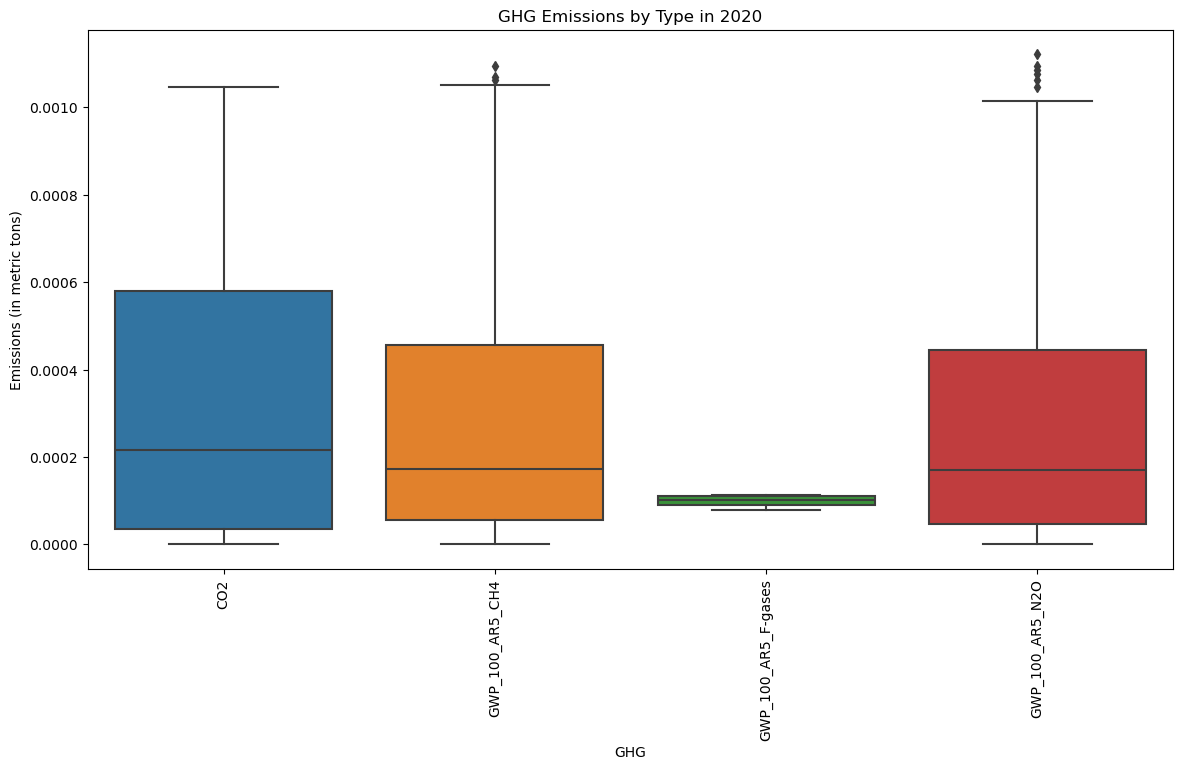

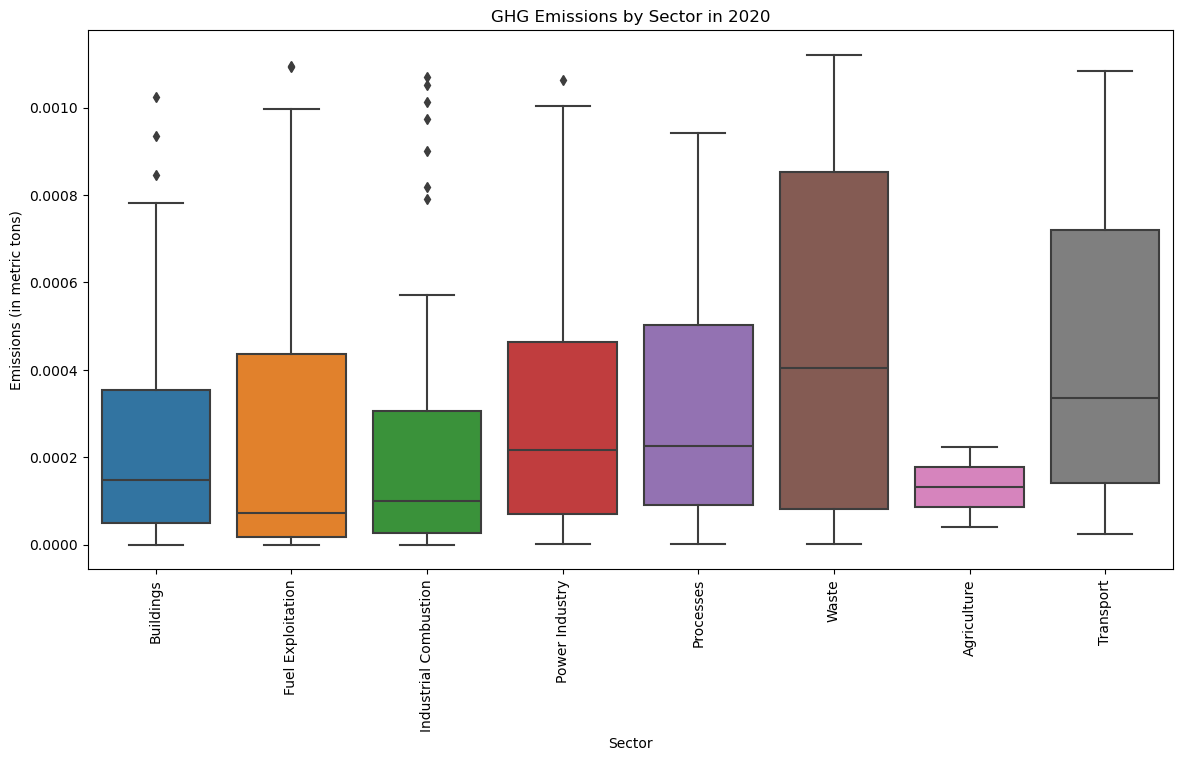

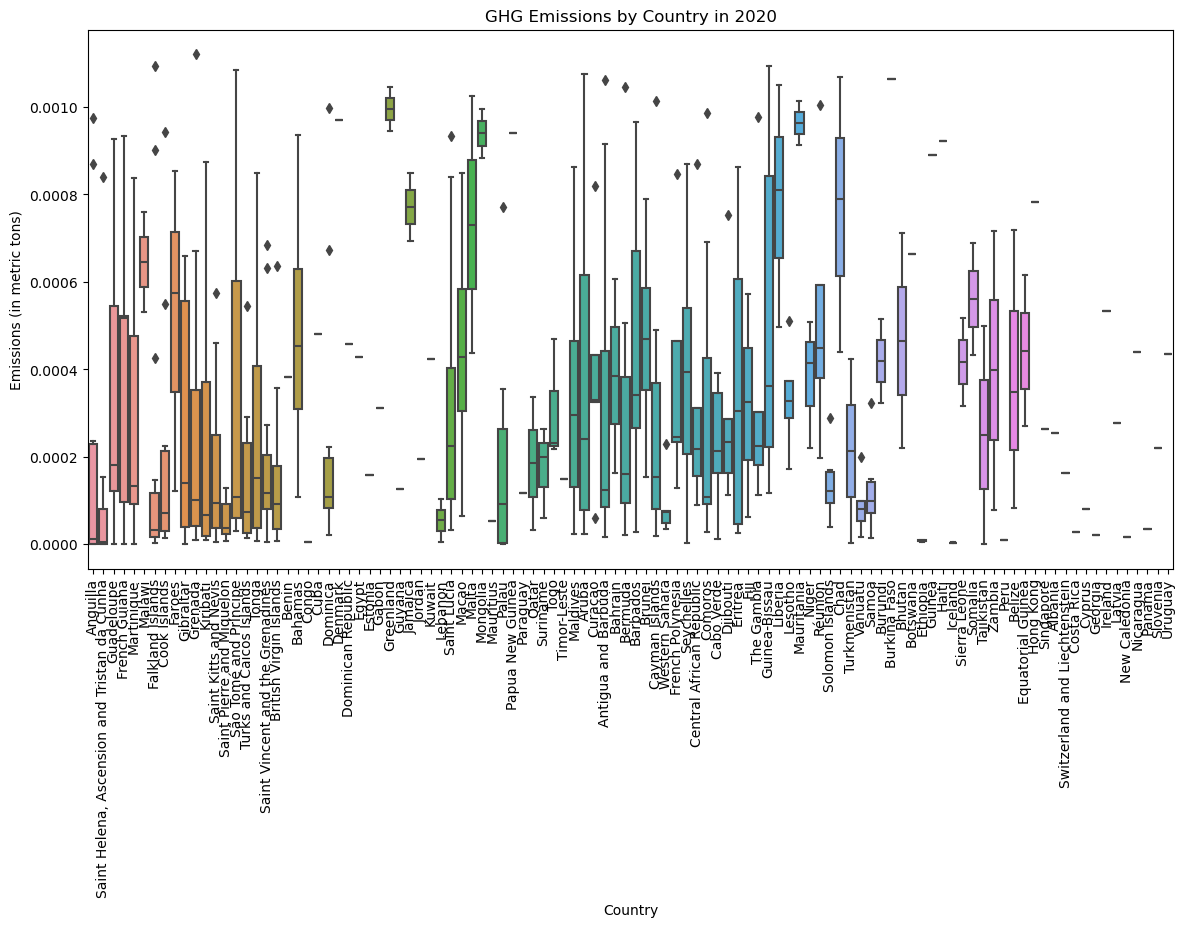

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load the dataset
file_path = '/Users/ging/Documents/Data Analytics Course/GHG Emissions Worldwide/02 Data/Prepared Data/GHG_Emissions_World_Sector_Country_Cleaned.xlsx'
data = pd.read_excel(file_path)

# Define the output directory
output_dir = '/Users/ging/Documents/Data Analytics Course/GHG Emissions Worldwide/04 Analysis/Visualizations'
os.makedirs(output_dir, exist_ok=True)

# Create categorical plot for GHG and Emissions in 2020
plt.figure(figsize=(14, 7))
sns.boxplot(x='GHG', y=2020, data=data)
plt.title('GHG Emissions by Type in 2020')
plt.ylabel('Emissions (in metric tons)')
plt.xlabel('GHG')
plt.xticks(rotation=90)
output_filepath_ghg = os.path.join(output_dir, 'categorical_plot_ghg.png')
plt.savefig(output_filepath_ghg)
plt.show()

# Create categorical plot for Sector and Emissions in 2020
plt.figure(figsize=(14, 7))
sns.boxplot(x='Sector', y=2020, data=data)
plt.title('GHG Emissions by Sector in 2020')
plt.ylabel('Emissions (in metric tons)')
plt.xlabel('Sector')
plt.xticks(rotation=90)
output_filepath_sector = os.path.join(output_dir, 'categorical_plot_sector.png')
plt.savefig(output_filepath_sector)
plt.show()

# Create categorical plot for Country and Emissions in 2020
plt.figure(figsize=(14, 7))
sns.boxplot(x='Country', y=2020, data=data)
plt.title('GHG Emissions by Country in 2020')
plt.ylabel('Emissions (in metric tons)')
plt.xlabel('Country')
plt.xticks(rotation=90)
output_filepath_country = os.path.join(output_dir, 'categorical_plot_country.png')
plt.savefig(output_filepath_country)
plt.show()


## Interpretation of the Categorical Plots

GHG Emissions by Type in 2020

CO2: Carbon dioxide (CO2) shows a wide range of emissions with the highest median value. The box is quite tall, indicating high variability in CO2 emissions across different sources. The whiskers and outliers suggest that while many sources have moderate emissions, some have extremely high values.

AR5_CH4: Methane (CH4) emissions also show a high median value, slightly lower than CO2. The variability is significant, but there are fewer extreme outliers compared to CO2.

AR5_F_gases: Fluorinated gases (F-gases) have the lowest emissions and least variability. The boxplot indicates that most sources emit very little of these gases.

AR5_N2O: Nitrous oxide (N2O) shows moderate emissions with some variability. The presence of outliers indicates that certain sources have unusually high emissions.

Interpretation: CO2 and CH4 are the predominant GHGs with significant emissions and variability. Efforts to reduce emissions should primarily focus on these gases. F-gases, while less significant in terms of total emissions, should not be overlooked due to their high global warming potential.

GHG Emissions by Sector in 2020

Buildings: This sector shows moderate emissions with a relatively consistent range, indicating that most buildings have similar emission levels.

Fuel Exploitation: This sector has high variability and some extreme outliers, suggesting that certain fuel exploitation activities are significant sources of emissions.

Industrial Combustion: Shows moderate to high emissions with a fairly wide range, indicating variability in industrial practices.

Power Industry: This sector has high emissions with significant variability, highlighting it as a major contributor to GHG emissions.

Processes: Moderate emissions with a consistent range, similar to buildings.

Waste: This sector has the highest median emissions and significant variability, making it a critical area for emissions control.

Agriculture: Shows the lowest emissions with very little variability, indicating consistent emissions across the sector.

Transport: This sector shows high emissions with substantial variability, highlighting its importance in emission reduction strategies.

Interpretation: The Power Industry, Waste, and Transport sectors are significant contributors to GHG emissions and exhibit high variability, indicating potential areas for substantial emission reductions. Targeted interventions in these sectors could yield significant benefits.

GHG Emissions by Country in 2020

Country Differences: The plot shows a wide range of emissions across different countries, with some countries having very high median emissions and others having low emissions. There is significant variability within countries, indicated by the height of the boxes and the presence of outliers.

High Emissions Countries: Some countries exhibit high emissions with wide variability, suggesting that emission sources within these countries are diverse and substantial.

Low Emissions Countries: Other countries show low median emissions with narrow ranges, indicating more consistent and lower emission levels.

Interpretation: There is considerable variability in GHG emissions across countries. Countries with high emissions and significant variability should be the focus of targeted emission reduction policies. Understanding the sources of variability within these countries can help in designing effective interventions.

Conclusion

These categorical plots provide valuable insights into the distribution of GHG emissions by type, sector, and country. The focus should be on reducing emissions from the most significant sources, such as CO2 and CH4, and high-emission sectors like the Power Industry, Waste, and Transport. Additionally, targeted policies in high-emission countries can help achieve substantial reductions in global GHG emissions.

## Analysis Based on Exploration and Graphs

Hypothesis 1: Developed countries have significantly reduced their GHG emissions over the past two decades compared to developing countries.
Question 1: Have developed countries reduced their GHG emissions more than developing countries in the past 20 years?
Type of Analysis: Comparative trend analysis.
Variables Used: Country, Year, Total Emissions.
Details: Compare emission trends of developed (e.g., USA, UK) vs. developing countries (e.g., India, Brazil) from 2002 to 2022.

Answer:
Based on the pair plot and categorical plot for countries, there is significant variability in GHG emissions across different countries. To conclusively answer this question, a detailed trend analysis comparing specific developed and developing countries' emission data from 2002 to 2022 is required. The current visualizations suggest variability but do not specifically differentiate trends over the last 20 years.

Hypothesis 2: The transport sector shows a slower decline in emissions compared to other sectors.
Question 2: Is the decline in GHG emissions slower in the transport sector compared to other sectors?
Type of Analysis: Sectoral trend analysis.
Variables Used: Sector, Year, Total Emissions.
Details: Analyze the emission trends for different sectors over time, focusing on the transport sector.

Answer:
The categorical plot for sectors shows that the transport sector has high emissions with substantial variability. To determine if the decline in emissions is slower, a trend analysis over multiple years comparing the transport sector to others is needed. The current data indicates that the transport sector is a significant emitter, but detailed trend analysis is necessary for a definitive answer.

Hypothesis 3: The introduction of international agreements (e.g., Paris Agreement) has led to a reduction in GHG emissions.
Question 3: Did the introduction of international agreements (e.g., Paris Agreement) lead to a reduction in GHG emissions?
Type of Analysis: Before-and-after analysis.
Variables Used: Year, Total Emissions, Country.
Details: Compare emission levels before and after the introduction of international agreements.

Answer:
The pair plot and categorical plots indicate a variety of emission levels before and after 2015 (the year of the Paris Agreement). A detailed before-and-after analysis is required to conclude whether the introduction of international agreements led to a significant reduction in GHG emissions.

Hypothesis 4: Global GHG emissions have increased significantly since 1970.
Question 4: How have GHG emissions trends changed globally from 1970 to 2022?
Type of Analysis: Trend analysis.
Variables Used: Year, Total Emissions.

Answer:
The pair plot indicates that emissions have strong linear relationships over the years, suggesting an overall increase. However, to accurately determine the global trend from 1970 to 2022, a more detailed time-series analysis is required. Preliminary observations support the hypothesis that global GHG emissions have increased.

Hypothesis 5: The top contributors to GHG emissions have shifted over the decades.
Question 5: Which countries are the top contributors to GHG emissions, and how has this changed over time?
Type of Analysis: Ranking and trend analysis.
Variables Used: Country, Year, Total Emissions.

Answer:
The categorical plot for countries shows significant variability in emissions across different countries. To identify the top contributors and observe changes over time, a detailed ranking and trend analysis is needed. Preliminary data suggest variability but do not provide a conclusive list of top contributors over time.

Hypothesis 6: CO2 is the dominant GHG emitted.
Question 6: What is the contribution of each GHG type (e.g., CO2, CH4) to total emissions?
Type of Analysis: Descriptive analysis.
Variables Used: GHG, Total Emissions.

Answer:
The categorical plot for GHG types shows that CO2 and CH4 are significant contributors to total emissions, with CO2 having the highest median emissions. This supports the hypothesis that CO2 is the dominant GHG emitted.

Hypothesis 7: Emission patterns vary significantly between sectors.
Question 7: How do emission patterns differ between sectors (e.g., transport, power industry)?
Type of Analysis: Comparative sectoral analysis.
Variables Used: Sector, Year, Total Emissions.

Answer:
The categorical plot for sectors shows that emission patterns indeed vary significantly between sectors. Sectors like the Power Industry, Waste, and Transport exhibit high emissions and substantial variability, while others like Agriculture have lower and more consistent emissions. This supports the hypothesis that emission patterns vary significantly between sectors.

## New Questions Based on Early Findings (IMPORTANT - SOME OF THE QUESTIONS ARE BEYOND THE SCOPE OF THE DATA)
What factors contribute to the high variability in emissions within the Power Industry, Waste, and Transport sectors?

Type of Analysis: In-depth sectoral analysis.
Variables Used: Sector, Country, Year, Specific Emission Sources.
Which countries have shown the most significant reduction in emissions since the Paris Agreement?

Type of Analysis: Before-and-after country-specific analysis.
Variables Used: Country, Year, Total Emissions.
What are the main drivers of emissions in countries with the highest variability?

Type of Analysis: Detailed country-specific analysis.
Variables Used: Country, Year, Sector, Emission Sources.
How do seasonal variations affect emissions within high-emission sectors?

Type of Analysis: Time-series analysis with seasonal decomposition.
Variables Used: Sector, Month/Season, Year, Total Emissions.
